In [3]:
import pandas as pd
import re
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import matplotlib.pyplot as plt

In [4]:
def codetokey(code):
    codekey = {
        1:"Mouse: left button",
        2:"Mouse: middle button",
        3:"Mouse: right button",

        8:"Backspace",
        9:"Tab",

        12:"Clear",
        13:"Enter",

        16:"Shift",
        17:"Ctrl",
        18:"Alt",
        19:"Pause/Break",
        20:"Caps Lock",
        21:"Hangul",
        25:"Hanja",
        27:"Escape",
        28:"Conversion",
        29:"Non-Conversion",
        32:"Spacebar",
        33:"Page Up",
        34:"Page Down",
        35:"End",
        36:"Home",
        37:"Arrow Left",
        38:"Arrow Up)",
        39:"Arrow Right",
        40:"Arrow Down",
        41:"Select",
        42:"Print",
        43:"Execute",
        44:"Print Screen",
        45:"Insert",
        46:"Delete",
        47:"Help",
        91:"Window Left",
        92:"Window Right",
        93:"Context Menu (select key)",
        96:"NumPad 0",
        97:"NumPad 1",
        98:"NumPad 2",
        99:"NumPad 3",
        100:"NumPad 4",
        101:"NumPad 5",
        102:"NumPad 6",
        103:"NumPad 7",
        104:"NumPad 8",
        105:"NumPad 9",
        106:"NumPad * (multiply)",
        107:"NumPad + (add)",
        109:"NumPad - (subtract)",
        110:"NumPad . (decimal point)",
        111:"NumPad / (divide)",
        112:"F1",
        113:"F2",
        114:"F3",
        115:"F4",
        116:"F5",
        117:"F6",
        118:"F7",
        119:"F8",
        120:"F9",
        121:"F10",
        122:"F11",
        123:"F12",
        144:"Num Lock",
        145:"Scroll Lock",
        186:";",
        187:"=",
        188:",",
        189:"-",
        190:".",
        191:"/",
        192:"`",
        219:"[",
        220:"\\",
        221:"]",
        222:"'",
    }
    if code in codekey:
        return codekey[code]
    elif code>=65 and code<=90:
        return "Character"
    elif code>=58 and code<=64:
        return "Special Ch"
    elif code>=48 and code<=57:
        return "Number"
    else:
        return "Unknown"

In [73]:
trans_sets = pd.read_csv('data/mt.corpusdivide_complete.csv')

In [75]:
# trans_pairs['type'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_type(x))
# trans_pairs['level'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_level(x))
# trans_pairs['story'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_story(x))

trans_sets['type'] = trans_sets['corpus'].apply(lambda x: breakdown_type(x))
trans_sets['level'] = trans_sets['corpus'].apply(lambda x: breakdown_level(x))
trans_sets['story'] = trans_sets['corpus'].apply(lambda x: breakdown_story(x))
trans_sets['direction'] = trans_sets['corpus'].apply(lambda x: breakdown_direction(x))
# trans_pairs.head()
trans_sets.head()

,id,corpus,src
0,3666,sand_test1 | English,my name is sandipan
1,3665,Test_sand | Hindi,हम रास्ते में नाश्ता कर सकते हैं
2,3664,Test_sand | Hindi,हम एक साथ ऑफिस जा सकते हैं
3,3663,Test_sand | Hindi,क्या आप कल सुबह यहाँ आ सकते हैं
4,3662,नानी की ऐनक MT L2 | English,she really is the best


In [32]:
trans_pairs = pd.read_csv('data/mt.translatedsentence_complete.csv')
len(trans_pairs)

7649

In [33]:
keystrokes = pd.read_csv('data/mt.dockeystroke.csv')
keystrokes.head()

,id,translatedSet,keystrokeseries,trump
0,339,Test User | Jungle Brew MT L4 | Hindi -> English,"[['Default Layout', 1], [1, 8872], ['card37', ...",Y
1,338,Test User | At Least I'm Ok MT L3 | Hindi -> E...,"[['Default Layout', 2], [1, 3919], ['card42', ...",Y
2,337,Test User 301 | Monsoon | Hindi -> English,"[['Default Layout', 2], [1, 7694], ['card0', 7...",Y
3,336,Test User 301 | Whats That Smell PE L3 | Hindi...,"[['Default Layout', 4], [1, 16561], ['card0', ...",Y
4,335,Test User 301 | A Helping Hand BL L4 | Hindi -...,"[['Default Layout', 2], [1, 8334], ['card1', 8...",Y


In [34]:
def break_user(x):
    xs1 = x.split('|')
    
    if len(xs1) > 1:
        return xs1[0]
        
def breakdown_level(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-1]
    return ''

def breakdown_type(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-2]
    return ''

def breakdown_story(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return ' '.join(xs2[:-2])
    return ''

def breakdown_direction(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        return xs1[2].strip()

In [35]:
# trans_pairs['type'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_type(x))
# trans_pairs['level'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_level(x))
# trans_pairs['story'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_story(x))

keystrokes['user'] = keystrokes['translatedSet'].apply(lambda x: break_user(x))
keystrokes['type'] = keystrokes['translatedSet'].apply(lambda x: breakdown_type(x))
keystrokes['level'] = keystrokes['translatedSet'].apply(lambda x: breakdown_level(x))
keystrokes['story'] = keystrokes['translatedSet'].apply(lambda x: breakdown_story(x))
keystrokes['direction'] = keystrokes['translatedSet'].apply(lambda x: breakdown_direction(x))
keystrokes['total_keys'] = keystrokes['keystrokeseries'].apply(lambda x: len(ast.literal_eval(x)))
keystrokes['total_time'] = keystrokes['keystrokeseries'].apply(lambda x: ast.literal_eval(x)[-1][1])
# trans_pairs.head()

In [36]:
keystrokes = keystrokes[keystrokes['direction'] == 'Hindi -> English']

In [37]:
keystrokes = keystrokes[keystrokes['type'] != '']

In [38]:
keystrokes = (keystrokes[keystrokes['user'].str.contains('Test User')])
# len(keystrokes)

In [39]:

# keystrokes.head()
keystrokes['type'].replace('', np.nan, inplace=True)
keystrokes.dropna(subset=['type'], inplace=True)

In [40]:
keystrokes[(keystrokes['type'] == 'MT')].rename(columns = {'total_keys': 'Keys', 'total_time':'Time'}).corr().iloc[1:, 1:]

,Keys,Time
Keys,1.000000,0.277301
Time,0.277301,1.000000


In [41]:
#Remove outliers from the data
q = keystrokes["total_time"].quantile(0.99)
keystrokes = keystrokes[keystrokes["total_time"] < q]

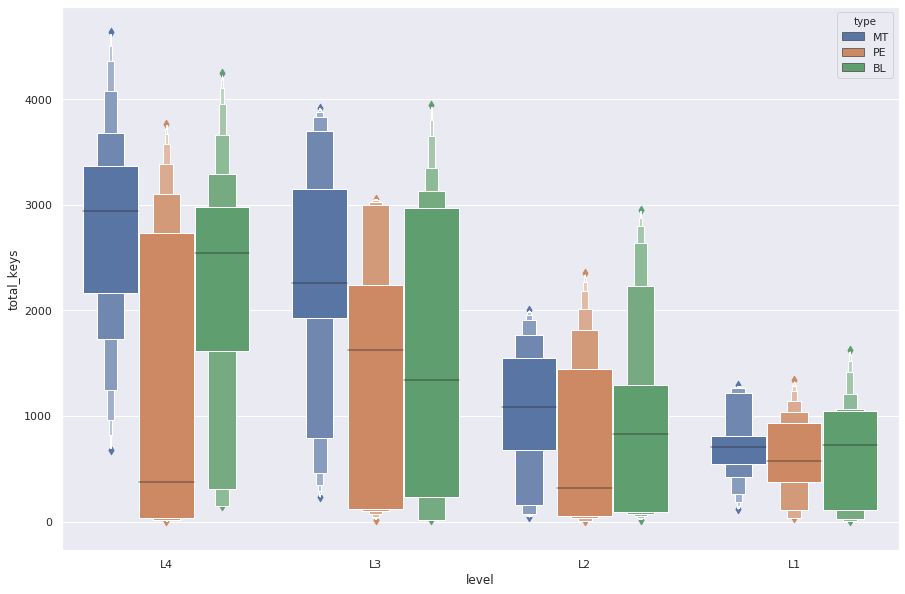

In [42]:
# g = sns.PairGrid(keystrokes, hue="type")
# g = g.map_diag(plt.hist, histtype="step", linewidth=3)
# g = g.map_offdiag(plt.scatter)
# g = g.add_legend()
# g
sns.set(rc={'figure.figsize':(15,10)})
sns.boxenplot(x='level', y='total_keys', hue='type', data=keystrokes)

In [43]:
qualitydf = pd.read_csv('./data/quality.csv')

In [50]:
fulldf = pd.merge(keystrokes, qualitydf, on=['user', 'story'])

In [70]:
fulldf[fulldf['type'] == 'MT'].corr().iloc[1:, 1:]

,total_keys,total_time,score,bleu-1,bleu-2,bleu-3,bleu-4
total_keys,1.000000,0.605671,-0.043602,0.038532,0.028221,0.024765,0.023042
total_time,0.605671,1.000000,0.044494,0.040202,0.041729,0.042766,0.043414
score,-0.043602,0.044494,1.000000,0.787770,0.776132,0.771770,0.769492
bleu-1,0.038532,0.040202,0.787770,1.000000,0.998521,0.997312,0.996560
bleu-2,0.028221,0.041729,0.776132,0.998521,1.000000,0.999820,0.999590
bleu-3,0.024765,0.042766,0.771770,0.997312,0.999820,1.000000,0.999953
bleu-4,0.023042,0.043414,0.769492,0.996560,0.999590,0.999953,1.000000


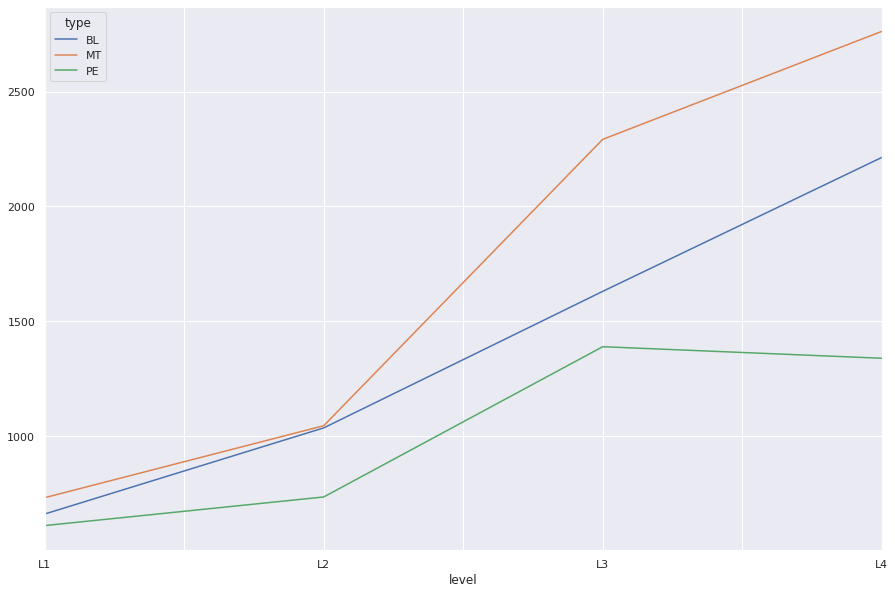

In [72]:
fulldf.groupby(['level','type']).mean()['total_keys'].unstack().plot()

In [20]:
granular = keystrokes.copy()
granular.head()

,id,translatedSet,keystrokeseries,trump,user,type,level,story,direction,total_keys,total_time
0,339,Test User | Jungle Brew MT L4 | Hindi -> English,"[['Default Layout', 1], [1, 8872], ['card37', ...",Y,Test User,MT,L4,Jungle Brew,Hindi -> English,3347,2342218
3,336,Test User 301 | Whats That Smell PE L3 | Hindi...,"[['Default Layout', 4], [1, 16561], ['card0', ...",Y,Test User 301,PE,L3,Whats That Smell,Hindi -> English,3017,3658123
4,335,Test User 301 | A Helping Hand BL L4 | Hindi -...,"[['Default Layout', 2], [1, 8334], ['card1', 8...",Y,Test User 301,BL,L4,A Helping Hand,Hindi -> English,2717,2192266
5,334,Test User 1302 | A Helping Hand MT L4 | Hindi ...,"[['Default Layout', 2], [1, 3945], ['card0', 3...",Y,Test User 1302,MT,L4,A Helping Hand,Hindi -> English,2978,3908143
7,332,Test User 301 | The Rabbit's Long Ears MT L2 |...,"[['Default Layout', 2], [1, 8230], ['card0', 8...",Y,Test User 301,MT,L2,The Rabbit's Long Ears,Hindi -> English,1661,1329803


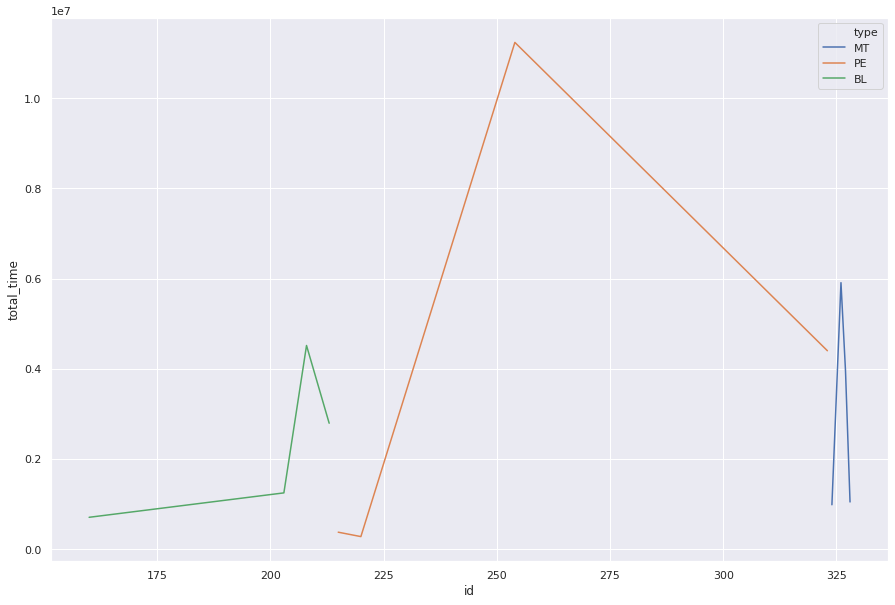

In [21]:
sns.lineplot(x="id", y="total_time", hue="type", data=keystrokes[keystrokes['user'].str.contains('User 601')])

In [22]:
keylist = []
for i in range(222):
    keyc = codetokey(i)
    if keyc not in keylist:
        keylist.append(keyc)

In [23]:
for i in keylist:
    granular[i] = 0

In [24]:
def keystrokedict(numks):
    keys = {}
    for i in numks:
        if type(i[0]) != str:
            if codetokey(i[0]) in keys:
                keys[codetokey(i[0])] += 1
            else:
                keys[codetokey(i[0])] = 1
    return keys

In [25]:
for j in range(len(keystrokes)):
    numks = ast.literal_eval(granular.iloc[j]['keystrokeseries'])
    D = keystrokedict(numks)
    for k, v in D.items():
        granular.at[j, k] = v

In [26]:
granular[(granular['type'] == 'BL') & (granular['level'] == 'L1')]

,id,translatedSet,keystrokeseries,trump,user,type,level,story,direction,total_keys,...,=,",",-,.,/,`,[,\,],'
158,160.0,Test User 601 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 3], [1, 5235], [1, 17184],...",Y,Test User 601,BL,L1,My Best Friend,Hindi -> English,723.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
166,152.0,Test User 701 | The Moon and The Cap BL L1 | H...,"[['Default Layout', 5], [1, 82226], ['card0', ...",Y,Test User 701,BL,L1,The Moon and The Cap,Hindi -> English,1627.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
183,130.0,Test User 1301 | My Home BL L1 | Hindi -> English,"[['Default Layout', 1], [1, 11212], ['card8', ...",Y,Test User 1301,BL,L1,My Home,Hindi -> English,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
186,113.0,Test User 1601 | My Home BL L1 | Hindi -> English,"[['Default Layout', 6], [1, 6637], ['card0', 7...",Y,Test User 1601,BL,L1,My Home,Hindi -> English,808.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
189,110.0,Test User 401 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 1], [1, 18825], ['card0', ...",Y,Test User 401,BL,L1,My Best Friend,Hindi -> English,1050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
190,109.0,Test User 901 | The Moon and The Cap BL L1 | H...,"[['Default Layout', 1], [1, 1466], ['card0', 1...",Y,Test User 901,BL,L1,The Moon and The Cap,Hindi -> English,1072.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
193,106.0,Test User 1001 | The Moon and The Cap BL L1 | ...,"[['Default Layout', 1], [1, 1975], ['card1', 1...",Y,Test User 1001,BL,L1,The Moon and The Cap,Hindi -> English,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
197,102.0,Test User 301 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 1], [1, 3805], ['card4', 3...",Y,Test User 301,BL,L1,My Best Friend,Hindi -> English,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
198,100.0,Test User 1101 | The Moon and The Cap BL L1 | ...,"[['Default Layout', 1], [1, 1699], ['card1', 1...",Y,Test User 1101,BL,L1,The Moon and The Cap,Hindi -> English,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
200,98.0,Test User 501 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 1], [1, 1190], ['card0', 1...",Y,Test User 501,BL,L1,My Best Friend,Hindi -> English,626.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [27]:
granular.drop(columns=['total_keys', 'total_time'], inplace=True)

In [28]:
newkeylist = ['Unknown',
 'Mouse: left button',
 'Mouse: right button',
 'Backspace',
 'Tab',
 'Enter',
 'Shift',
 'Ctrl',
 'Alt',
 'Pause/Break',
 'Caps Lock',
 'Escape',
 'Spacebar',
 'Page Up',
 'Page Down',
 'End',
 'Home',
 'Arrow Left',
 'Arrow Up)',
 'Arrow Right',
 'Arrow Down',
 'Insert',
 'Delete',
 'Number',
 'Character',
 ',',
 '.',
]

In [29]:
granular[(granular['type'] == 'BL') & (granular['level'] == 'L1')]

,id,translatedSet,keystrokeseries,trump,user,type,level,story,direction,Unknown,...,=,",",-,.,/,`,[,\,],'
158,160.0,Test User 601 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 3], [1, 5235], [1, 17184],...",Y,Test User 601,BL,L1,My Best Friend,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
166,152.0,Test User 701 | The Moon and The Cap BL L1 | H...,"[['Default Layout', 5], [1, 82226], ['card0', ...",Y,Test User 701,BL,L1,The Moon and The Cap,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
183,130.0,Test User 1301 | My Home BL L1 | Hindi -> English,"[['Default Layout', 1], [1, 11212], ['card8', ...",Y,Test User 1301,BL,L1,My Home,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
186,113.0,Test User 1601 | My Home BL L1 | Hindi -> English,"[['Default Layout', 6], [1, 6637], ['card0', 7...",Y,Test User 1601,BL,L1,My Home,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
189,110.0,Test User 401 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 1], [1, 18825], ['card0', ...",Y,Test User 401,BL,L1,My Best Friend,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
190,109.0,Test User 901 | The Moon and The Cap BL L1 | H...,"[['Default Layout', 1], [1, 1466], ['card0', 1...",Y,Test User 901,BL,L1,The Moon and The Cap,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
193,106.0,Test User 1001 | The Moon and The Cap BL L1 | ...,"[['Default Layout', 1], [1, 1975], ['card1', 1...",Y,Test User 1001,BL,L1,The Moon and The Cap,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
197,102.0,Test User 301 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 1], [1, 3805], ['card4', 3...",Y,Test User 301,BL,L1,My Best Friend,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
198,100.0,Test User 1101 | The Moon and The Cap BL L1 | ...,"[['Default Layout', 1], [1, 1699], ['card1', 1...",Y,Test User 1101,BL,L1,The Moon and The Cap,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
200,98.0,Test User 501 | My Best Friend BL L1 | Hindi -...,"[['Default Layout', 1], [1, 1190], ['card0', 1...",Y,Test User 501,BL,L1,My Best Friend,Hindi -> English,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


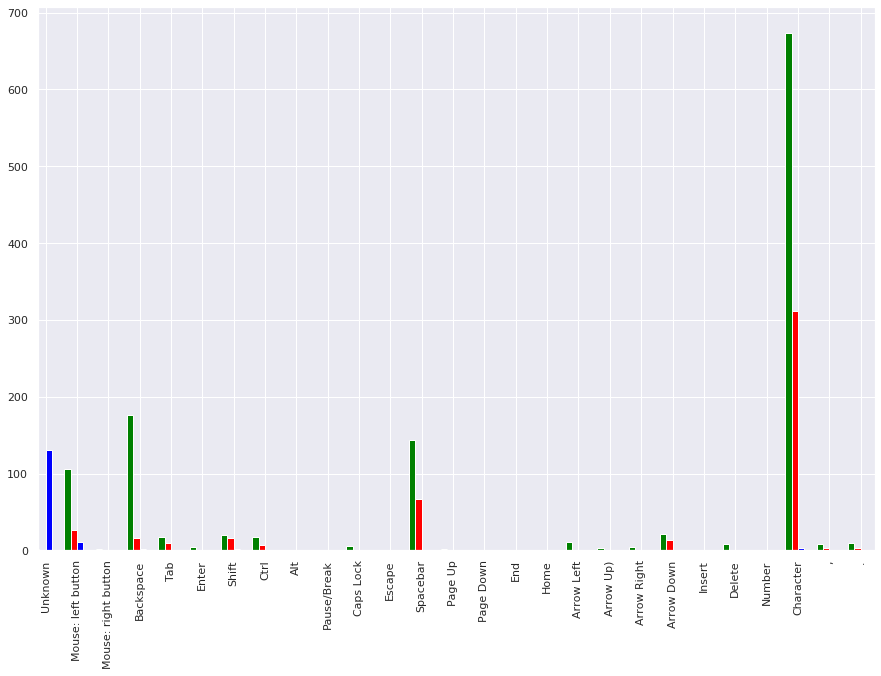

In [30]:
# levene(granular[granular['type'] == 'MT'][newkeylist].corr(),granular[granular['type'] == 'MT'][newkeylist].corr(), granular[granular['type'] == 'MT'][newkeylist].corr())
# sns.heatmap(granular[granular['type'] == 'MT'][newkeylist].corr()[], cmap="YlGnBu")
# width = 0.4

# fig = plt.figure()
# ax = fig.add_subplot(111)

# ind = np.arange(len(keylist))
# width = 0.4

# granular[granular['type'] == 'MT'][newkeylist].mean().plot(kind='bar', color='green', width=0.2, position=2)
# granular[granular['type'] == 'PE'][newkeylist].mean().plot(kind='bar', color='red', width=0.2, position=1)
# granular[granular['type'] == 'BL'][newkeylist].mean().plot(kind='bar', color='blue', width=0.2, position=0)
# ax.bar(ind, granular[granular['type'] == 'MT'][newkeylist].mean(), width)
granular[(granular['type'] == 'MT') & (granular['level'] == 'L1')][newkeylist].mean().plot(kind='bar', color='green', width=0.2, position=2)
granular[(granular['type'] == 'PE') & (granular['level'] == 'L1')][newkeylist].mean().plot(kind='bar', color='red', width=0.2, position=1)
granular[(granular['type'] == 'BL') & (granular['level'] == 'L4')][newkeylist].mean().plot(kind='bar', color='blue', width=0.2, position=0)

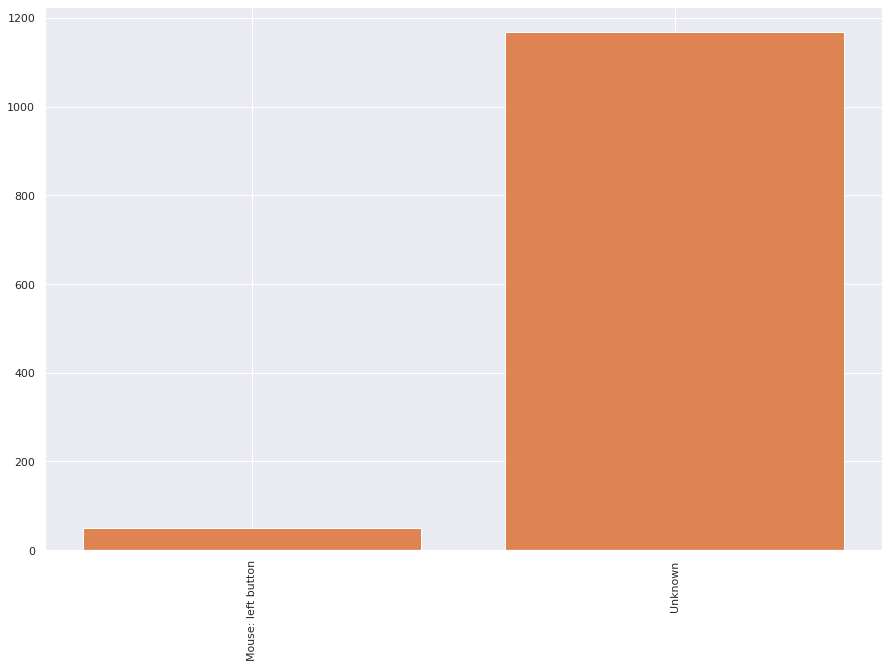

In [21]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation=90)
plt.show()

In [22]:
new_keystrokes = keystrokes[['type', 'level', 'total_keys', 'total_time', 'story']]

#Drop empty fields
new_keystrokes['type'].replace('', np.nan, inplace=True)
new_keystrokes.dropna(subset=['type'], inplace=True)
new_keystrokes.head()

/home/t-sesan/.local/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/t-sesan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,type,level,total_keys,total_time,story
0,MT,L4,3347,2342218,Jungle Brew
3,PE,L3,3017,3658123,Whats That Smell
4,BL,L4,2717,2192266,A Helping Hand
5,MT,L4,2978,3908143,A Helping Hand
7,MT,L2,1661,1329803,The Rabbit's Long Ears


In [23]:
len(new_keystrokes)

170

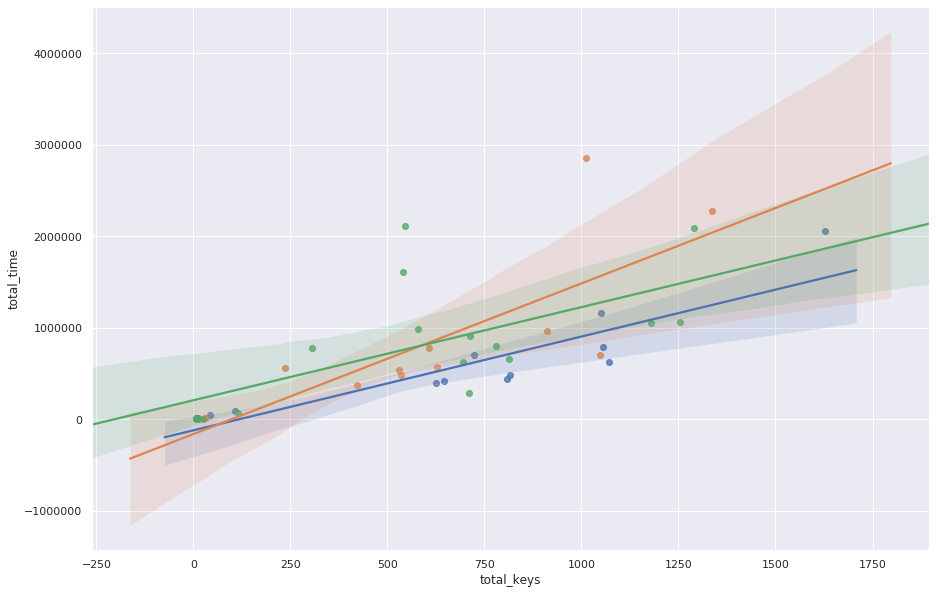

In [24]:
# sns.set(style="ticks")

# df = sns.load_dataset("iris")
sns.regplot(x="total_keys", y="total_time", data=new_keystrokes[(new_keystrokes['level'] == 'L1') & (new_keystrokes['type'] == 'BL')])
sns.regplot(x="total_keys", y="total_time", data=new_keystrokes[(new_keystrokes['level'] == 'L1') & (new_keystrokes['type'] == 'PE')])
sns.regplot(x="total_keys", y="total_time", data=new_keystrokes[(new_keystrokes['level'] == 'L1') & (new_keystrokes['type'] == 'MT')])

In [ ]:
df.head()

In [ ]:
trans_pairs['user'] = trans_pairs['translatedSet'].apply(lambda x: x.split('|')[0])

In [ ]:
trans_pairs.head()

In [ ]:
# trans_pairs['details'] = ' ((( ' + trans_pairs['type'] + ' ::: ' + trans_pairs['level'] + ' ::: ' + trans_pairs['user'] + ' ::: ' + trans_pairs['tgt'] + ' ))) '

In [ ]:
# trans_pairs[trans_pairs['details'].isnull()] = ''

In [ ]:
# agg_pairs = trans_pairs.groupby('src').agg({'details': lambda x: ' ||| '.join(x)})

In [ ]:
# agg_pairs.iloc[200]['details']

In [ ]:
trans_pairs[trans_pairs['type'] == 'BL']